Missing values:
Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64


<ipython-input-7-d47e43cdc065>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-7-d47e43cdc065>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-7-d47e43cdc065>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

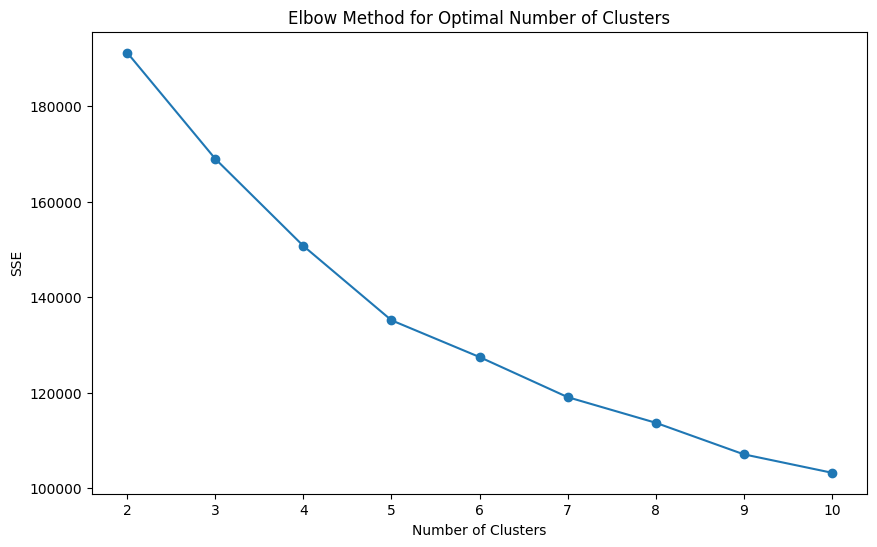

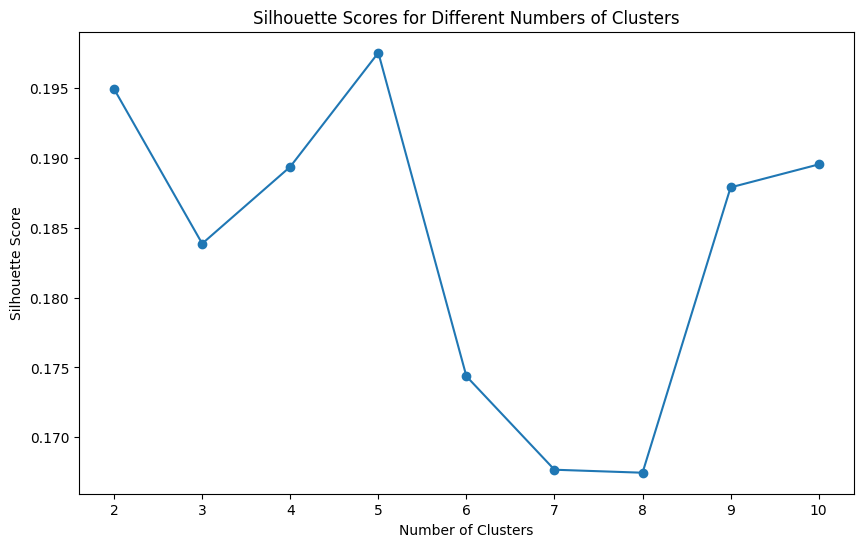

KeyboardInterrupt: 

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn.metrics import silhouette_score
from kmodes.kmodes import KModes
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv("cluster_airpassenger.csv")
df.head()

# missing value analysis
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)
df = df.dropna()

# encoding
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
df.head()


# nrmalization - coz distance based kmeans

numerical_columns = df.select_dtypes(include=['int', 'float']).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()


# Outlier analysis - not needed
# Linearity analysis not needed
# u cant smote in clustering 6381094979


# kmeans

sse = [] # Sum of Squared Errors. It quantifies the sum of squared distances between data points and their assigned cluster centroids
silhouette_scores = [] # It is calculated after clustering to evaluate the cohesion and separation of clusters. It measures how well-separated the clusters are and ranges from -1 to 1, with higher values indicating better-defined clusters.
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

# Plot the elbow curve - The point where the SSE starts decreasing at a slower rate (forming an "elbow" shape) can be considered as an indication of the optimal number of clusters.
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## HIERARCHICAL CLUSTERING

distance_matrix = pdist(df)

# Perform hierarchical clustering
Z = linkage(distance_matrix, method='ward')

# Compute cluster labels
n_clusters = 3  # Define the number of clusters
cluster_labels = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward').fit_predict(df)

# Compute silhouette score
silhouette_avg = silhouette_score(df, cluster_labels)

# Compute cophenetic correlation coefficient
c, coph_dists = cophenet(Z, distance_matrix)

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

print("Silhouette Score:", silhouette_avg)
print("Cophenetic Correlation Coefficient:", c)

# Z = linkage(df, method='ward')
# # Plot the dendrogram
# plt.figure(figsize=(12, 6))
# dendrogram(Z)
# plt.title('Dendrogram')
# plt.xlabel('Sample Index')
# plt.ylabel('Distance')
# plt.show()
# silhouette_avg = silhouette_score(df, Z)
# c, coph_dists = cophenet(Z, pdist(df))
# sse = sum(coph_dists)
# print("Silhouette Score:", silhouette_avg)
# print("SSE :", sse)


## k mode


sse = []
silhouette_scores = []
for k in range(2, 11):
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    clusters = km.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, clusters))
    # Approximate SSE
    cluster_modes = km.cluster_centroids_
    sse.append(sum([np.sum((df.values[clusters == i] - cluster_modes[i]) ** 2) for i in range(len(cluster_modes))]))

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()